In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

from datetime import datetime

In [3]:
df = pd.read_csv('full_dataset.csv')

In [4]:
df.head(50)

,Unnamed: 0,Date,Time,Global_desc,Specific_desc,Type_of_felony,ts,temp,snow,desc
0,0,01/01/2014,11:15:00,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY,1.388570e+09,-3.7,0.0,Scattered clouds
1,1,01/01/2014,11:35:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,1.388570e+09,-3.7,0.0,Scattered clouds
2,2,01/01/2014,11:49:00,OFFENSES AGAINST THE PERSON,RECKLESS ENDANGERMENT 2,MISDEMEANOR,1.388570e+09,-3.7,0.0,Scattered clouds
3,3,01/01/2014,11:45:00,FELONY ASSAULT,ASSAULT POLICE/PEACE OFFICER,FELONY,1.388570e+09,-3.7,0.0,Scattered clouds
4,4,01/01/2014,11:30:00,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,1.388570e+09,-3.7,0.0,Scattered clouds
5,5,01/01/2014,11:00:00,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,1.388570e+09,-3.7,0.0,Scattered clouds
6,6,01/01/2014,11:00:00,BURGLARY,"BURGLARY,RESIDENCE,NIGHT",FELONY,1.388570e+09,-3.7,0.0,Scattered clouds
7,7,01/01/2014,11:30:00,HARRASSMENT 2,"HARASSMENT,SUBD 1,CIVILIAN",VIOLATION,1.388570e+09,-3.7,0.0,Scattered clouds
8,8,01/01/2014,11:30:00,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",MISDEMEANOR,1.388570e+09,-3.7,0.0,Scattered clouds
9,9,01/01/2014,11:00:00,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,1.388570e+09,-3.7,0.0,Scattered clouds


# Visualizations

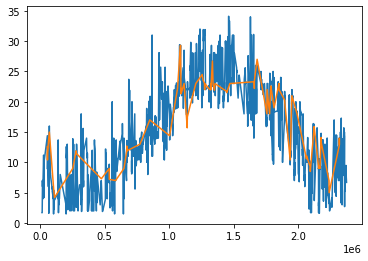

In [55]:
t_ls = df[df.desc == 'Light rain'].temp.plot()
t_hs = df[df.desc == 'Moderate rain'].temp.plot()
# plt.scatter(t_ls, t_hs)

In [ ]:
df.groupby('Type_of_felony').get_group('FELONY').temp.plot()

<AxesSubplot:title={'center':'temp'}, xlabel='Type_of_felony'>

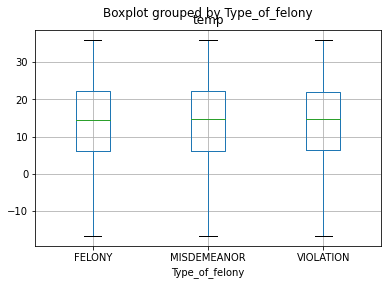

In [10]:
df.boxplot(column=['temp',], by='Type_of_felony')#, figsize=(100, 50))

<AxesSubplot:title={'center':'temp'}, xlabel='Specific_desc'>

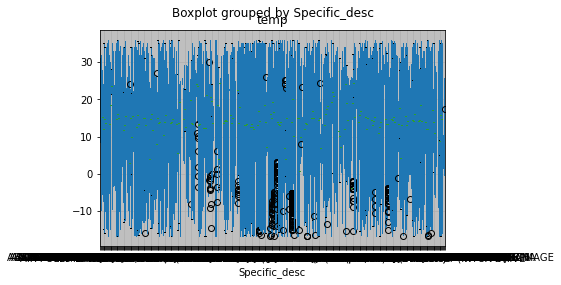

In [11]:
df.boxplot(column=['temp',], by='Specific_desc')#, figsize=(100, 50))

In [67]:
df.groupby('Global_desc').size().sort_values(ascending=False)[2:3].index

Index(['ASSAULT 3 & RELATED OFFENSES'], dtype='object', name='Global_desc')

In [78]:
df.groupby('Date').Type_of_felony.count().sort_values(ascending=False)

Date
01/01/2016    2327
01/01/2017    2159
01/01/2018    2041
01/01/2015    1990
06/01/2016    1942
              ... 
01/04/2018     772
02/09/2017     771
01/24/2016     711
01/23/2016     686
03/14/2017     630
Name: Type_of_felony, Length: 1826, dtype: int64

<AxesSubplot:>

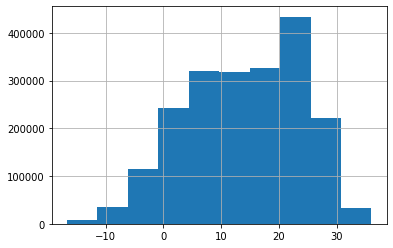

In [71]:
df[df['Global_desc'].isin(df.groupby('Global_desc').size().sort_values(ascending=False)[:12].index)].temp.hist()

In [58]:
df.pivot_table(index='Type_of_felony', columns=['desc'], values=['temp'], aggfunc=np.mean )

temp                                             \
desc           Broken clouds Clear Sky Few clouds Heavy rain Heavy snow   
Type_of_felony                                                            
FELONY             16.612837  9.653843  15.123051  21.076471  -1.034211   
MISDEMEANOR        16.607925  9.587130  15.036427  20.748175  -0.978528   
VIOLATION          16.600967  9.792054  15.146060  20.956604  -1.017857   

                                                                  \
desc           Light rain Light snow Mix snow/rain Moderate rain   
Type_of_felony                                                     
FELONY          14.942757  -2.699568      1.052354     16.557449   
MISDEMEANOR     14.920042  -2.599257      1.054185     16.354790   
VIOLATION       14.981318  -2.738399      1.050592     16.686563   

                                                           
desc           Overcast clouds Scattered clouds      Snow  
Type_of_felony                                             
FELONY               13.790736        17.188700 -1.196879  
MISDEMEANOR          13.831360        17.206294 -1.135665  
VIOLATION            13.884309        17.119136 -1.343653